### IMPORTACIÓN DE BIBLIOTECAS

In [143]:
from NSGAII import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [144]:
def generar_poblacion(n_soluciones, n_variables, limite_inferior=0, limite_superior=np.inf, tipo_codificacion="continua"):
    """
    Genera una población de soluciones aleatorias de forma genérica.

    Args:
        n_soluciones (int): El número de individuos a generar (ej. 10000).
        n_variables (int): El número de variables de decisión para cada individuo.
        limite_inferior (float or int): El límite inferior del rango de valores.
        limite_superior (float or int): El límite superior del rango de valores.
        tipo_codificacion (str): "continua" para valores flotantes (por defecto) o
                                 "discreta" para valores enteros.

    Returns:
        np.array: una matriz de tamaño (n_soluciones, n_variables) con valores
                  aleatorios dentro del rango y tipo especificados.
    """
    if tipo_codificacion == "continua":
        poblacion = limite_inferior + (limite_superior - limite_inferior) * np.random.rand(n_soluciones, n_variables)
    
    elif tipo_codificacion == "discreta":
        poblacion = np.random.randint(low=limite_inferior, high=limite_superior + 1, size=(n_soluciones, n_variables))
        
    else:
        raise ValueError("El 'tipo_codificacion' debe ser 'continua' o 'discreta'.")
        
    return poblacion

### Obtener la gráfica de una función

In [145]:
def graficar_frente_pareto(pareto_front, dimensions, problem_title):
    """
    Grafica el frente de Pareto en 2D o 3D.

    Args:
        pareto_front (list or np.array): Los valores de los objetivos de las
                                          soluciones no dominadas.
        dimensions (int): El número de objetivos a graficar (2 o 3).
        problem_title (str): El nombre del problema (ej. "DTLZ1").
    """
    
    # 1. Asegurarse de que los datos estén en un array de NumPy
    front = np.array(pareto_front)
    
    # 2. Construir el título según el formato solicitado
    title = f"Frente de pareto {problem_title} con {dimensions} objetivos"
    
    # --- Graficación en 2D ---
    if dimensions == 2:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Extraer los datos de los objetivos
        x_data = front[:, 0]
        y_data = front[:, 1]
        
        # Crear el gráfico de dispersión
        ax.scatter(x_data, y_data, c='blue', s=20, alpha=0.7, label="Soluciones no dominadas")
        
        # 3. Configurar etiquetas y título
        ax.set_xlabel("objetivo1")
        ax.set_ylabel("objetivo2")
        ax.set_title(title)
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend()

    # --- Graficación en 3D ---
    elif dimensions == 3:
        fig = plt.figure(figsize=(9, 7))
        # Crear los ejes 3D
        ax = fig.add_subplot(111, projection='3d')
        
        # Extraer los datos de los objetivos
        x_data = front[:, 0]
        y_data = front[:, 1]
        z_data = front[:, 2]
        
        # Crear el gráfico de dispersión 3D
        ax.scatter(x_data, y_data, z_data, c='red', s=20, alpha=0.6, label="Soluciones no dominadas")
        
        # 3. Configurar etiquetas y título
        ax.set_xlabel("objetivo1")
        ax.set_ylabel("objetivo2")
        ax.set_zlabel("objetivo3")
        ax.set_title(title)
        
        ax.legend()
        
    # --- Manejo de error ---
    else:
        print(f"Error: Dimensiones de graficación no soportadas: {dimensions}.")
        print("Esta función solo puede graficar en 2D o 3D.")
        return

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

## DTLZ1

In [146]:
def dtlz1(x, M):
    """
    DTLZ1 multi-objective test problem.
    x: decision variable vector (numpy array)
    M: number of objectives
    """
    N = len(x)
    k = N - M + 1

    # g function
    g = 100 * (k + np.sum((x[M-1:] - 0.5)**2 - np.cos(20 * np.pi * (x[M-1:] - 0.5))))

    # Objective functions
    f = np.zeros(M)
    for i in range(M):
        prod = 1.0
        for j in range(M - 1 - i):
            prod *= x[j]
        if i > 0:
            prod *= (1 - x[M - 1 - i])
        f[i] = 0.5 * (1 + g) * prod
    return f

### Generando una población incial para DTLZ1

In [147]:
np.random.seed(42)
p_i_DTLZ1 = generar_poblacion(10000, 9, 0.0, 1.0, 'continua')
n_objetivos = 5

### Evaluando las soluciones en DTZ1

In [148]:
poblacion_DTLZ1 = [ ]
poblacion_vectores_DTLZ1_fitness = [ ]
for i in range(len(p_i_DTLZ1)):
    fitness = dtlz1(p_i_DTLZ1[i], n_objetivos)
    poblacion_DTLZ1.append([p_i_DTLZ1[i], fitness])
    poblacion_vectores_DTLZ1_fitness.append(fitness)
    

### Procesando por batches

In [150]:
tam_batch = len(poblacion_vectores_DTLZ1_fitness) // 10
frente_P_DTZ1 = [ ]
frente_P_DTZ1_idx = [ ]
for i in range(tam_batch,len(poblacion_DTLZ1)+tam_batch, tam_batch):
    print(f"--- Procesando el batch {i//10} ------")
    t_batch = poblacion_vectores_DTLZ1_fitness[i-tam_batch : i]
    t_vec, t_idxs = fast_non_dominated_sort_F1(t_batch)
    frente_P_DTZ1 = frente_P_DTZ1 + t_vec
    frente_P_DTZ1_idx = frente_P_DTZ1_idx + t_idxs


print(f"******* AL FINAL SE TIENE: {len(frente_P_DTZ1)} elementos *******")
print("Haciendo la evaluación final")
F1_dtlz1, F1_dtlz1_idxs = fast_non_dominated_sort_F1(frente_P_DTZ1, 'minimize')
print(f"La cantidad final de elementos en el frente son: {len(F1_dtlz1)}")
print(F1_dtlz1)



--- Procesando el batch 100 ------
--- Procesando el batch 200 ------
--- Procesando el batch 300 ------
--- Procesando el batch 400 ------
--- Procesando el batch 500 ------
--- Procesando el batch 600 ------
--- Procesando el batch 700 ------
--- Procesando el batch 800 ------
--- Procesando el batch 900 ------
--- Procesando el batch 1000 ------
******* AL FINAL SE TIENE: 1072 elementos *******
Haciendo la evaluación final
La cantidad final de elementos en el frente son: 234
[array([1.60002349e+00, 3.22059080e-01, 5.96300249e-02, 9.42903923e+01,
       3.96915066e+01]), array([2.06908382e+02, 6.21576365e+01, 2.15360808e+02, 1.63470412e+00,
       1.37266909e-01]), array([14.83926956,  7.37237496, 33.71122957, 11.43623941, 11.3593527 ]), array([ 54.82652869,   1.12060261, 135.11475711,  48.14994782,
         7.78311277]), array([ 2.92328487, 11.98400205, 16.01805994, 62.40685834,  2.73476823]), array([ 11.05305893, 135.14167672,   5.65356266, 127.03733151,
         2.43968079]), arra

### Graficando el frente de pareto

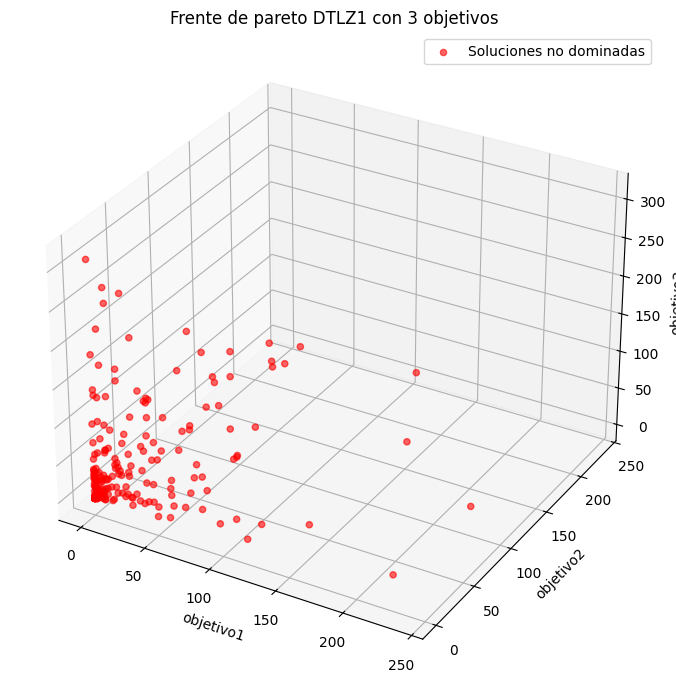

In [151]:
graficar_frente_pareto(F1_dtlz1, 3, 'DTLZ1')

## DTLZ2

In [152]:
def dtlz2(x, M):
    """
    DTLZ2 multi-objective test problem.
    x: decision variable vector (numpy array)
    M: number of objectives
    """
    N = len(x)

    # g function
    g = np.sum((x[M-1:] - 0.5)**2)

    # Objective functions
    f = np.zeros(M)
    for i in range(M):
        prod = 1.0
        for j in range(M - 1 - i):
            prod *= np.cos(x[j] * np.pi / 2)
        if i > 0:
            prod *= np.sin(x[M - 1 - i] * np.pi / 2)
        f[i] = (1 + g) * prod
    return f

### Generando la población inicial para DTLZ2

In [153]:
np.random.seed(42)
p_i_DTLZ2 = generar_poblacion(10000, 14, 0.0, 1.0, 'continua')
n_objetivos = 5

### Evaluando el fitness de la población en DTLZ2

In [154]:
poblacion_DTLZ2 = [ ]
poblacion_vectores_DTLZ2_fitness = [ ]
for i in range(len(p_i_DTLZ2)):
    fitness = dtlz2(p_i_DTLZ2[i], n_objetivos)
    poblacion_DTLZ2.append([p_i_DTLZ2[i], fitness])
    poblacion_vectores_DTLZ2_fitness.append(fitness)

### Procesando por batches DTLZ2

In [155]:
tam_batch = len(poblacion_vectores_DTLZ2_fitness) // 10
frente_P_DTZ2 = [ ]
frente_P_DTZ2_idx = [ ]
for i in range(tam_batch,len(poblacion_DTLZ2)+tam_batch, tam_batch):
    print(f"--- Procesando el batch {i//10} ------")
    t_batch = poblacion_vectores_DTLZ2_fitness[i-tam_batch : i]
    t_vec, t_idxs = fast_non_dominated_sort_F1(t_batch)
    frente_P_DTZ2 = frente_P_DTZ2 + t_vec
    frente_P_DTZ2_idx = frente_P_DTZ2_idx + t_idxs


print(f"******* AL FINAL SE TIENE: {len(frente_P_DTZ2)} elementos *******")
print("Haciendo la evaluación final")
F1_dtlz2, F1_dtlz2_idxs = fast_non_dominated_sort_F1(frente_P_DTZ2, 'minimize')
print(f"La cantidad final de elementos en el frente son: {len(F1_dtlz2)}")
print(F1_dtlz2)


--- Procesando el batch 100 ------
--- Procesando el batch 200 ------
--- Procesando el batch 300 ------
--- Procesando el batch 400 ------
--- Procesando el batch 500 ------
--- Procesando el batch 600 ------
--- Procesando el batch 700 ------
--- Procesando el batch 800 ------
--- Procesando el batch 900 ------
--- Procesando el batch 1000 ------
******* AL FINAL SE TIENE: 2534 elementos *******
Haciendo la evaluación final
La cantidad final de elementos en el frente son: 940
[array([0.79071265, 0.85473184, 0.60309087, 0.38858468, 0.40159874]), array([0.9296838 , 1.44684995, 0.08497323, 0.29464453, 0.06978851]), array([0.04925193, 0.0349741 , 1.4239976 , 0.5746657 , 0.67998251]), array([0.19550356, 0.02822753, 1.31924904, 0.0227111 , 0.93515808]), array([0.27432831, 0.08300193, 0.75666835, 0.38071551, 1.121987  ]), array([0.34743115, 1.15890992, 0.31929773, 0.32894814, 0.42404304]), array([0.34087372, 0.29319366, 1.02792036, 0.68016904, 0.79368712]), array([1.00649813, 0.92183408, 0.

### Graficando el frente de pareto para DTLZ2

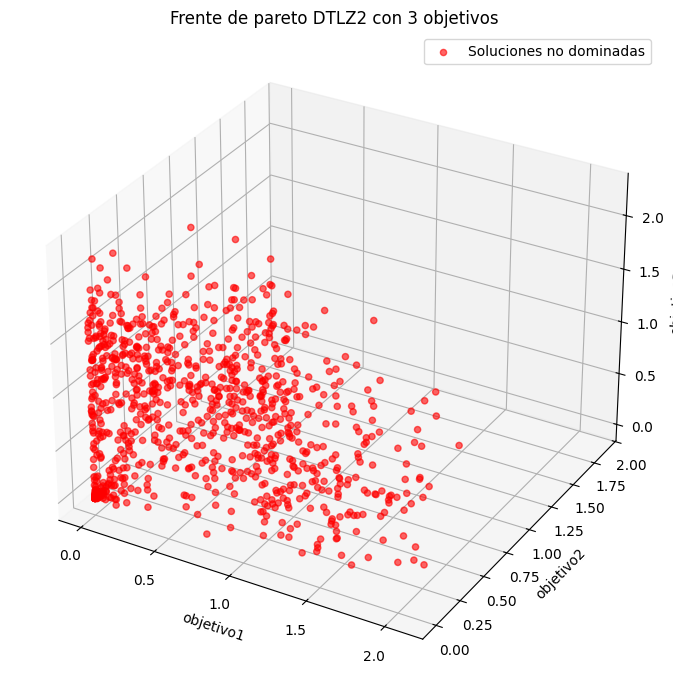

In [156]:
graficar_frente_pareto(F1_dtlz2, 3, 'DTLZ2')

## DTLZ7

In [157]:
def dtlz7(x, n_objetivos):
    """
    Calcula los valores de los M objetivos para una solución 'x' del problema DTLZ7.

    Args:
        x (np.array): Un vector de decisión de tamaño (n_variables,).
        n_objetivos (int): El número de objetivos (M).

    Returns:
        np.array: Un vector con los M valores de los objetivos calculados.
    """
    if x.shape[0] < n_objetivos:
        raise ValueError("El número de variables debe ser al menos el número de objetivos.")

    m = n_objetivos
    objetivos = np.zeros(m)
    
    objetivos[:m-1] = x[:m-1]

    # Separar x_II y calcular g(x_II)
    x_II = x[m-1:]
    g = 1 + (9.0 / len(x_II)) * np.sum(x_II)

    # Calcular h
    f_primeros = objetivos[:m-1]
    termino_suma_h = np.sum( (f_primeros / (1.0 + g)) * (1 + np.sin(3.0 * np.pi * f_primeros)) )
    h = m - termino_suma_h
    
    # Calcular el último objetivo, f_M
    objetivos[m-1] = (1 + g) * h

    return objetivos

### Generando una población incial para DTLZ7

In [158]:
np.random.seed(42)
p_i_DTLZ7 = generar_poblacion(10000, 24, 0.0, 1.0, 'continua')
n_objetivos = 5

### Evaluando el fitness para la población inicial de DTLZ7

In [159]:
poblacion_DTLZ7 = [ ]
poblacion_vectores_DTLZ7_fitness = [ ]
for i in range(len(p_i_DTLZ7)):
    fitness = dtlz7(p_i_DTLZ7[i], n_objetivos)
    poblacion_DTLZ7.append([p_i_DTLZ7[i], fitness])
    poblacion_vectores_DTLZ7_fitness.append(fitness)

### Procesando por batches para DTLZ7

In [160]:
tam_batch = len(poblacion_vectores_DTLZ7_fitness) // 10
frente_P_DTZ7 = [ ]
frente_P_DTZ7_idx = [ ]
for i in range(tam_batch,len(poblacion_DTLZ7)+tam_batch, tam_batch):
    print(f"--- Procesando el batch {i//10} ------")
    t_batch = poblacion_vectores_DTLZ7_fitness[i-tam_batch : i]
    t_vec, t_idxs = fast_non_dominated_sort_F1(t_batch)
    frente_P_DTZ7 = frente_P_DTZ7 + t_vec
    frente_P_DTZ7_idx = frente_P_DTZ7_idx + t_idxs


print(f"******* AL FINAL SE TIENE: {len(frente_P_DTZ7)} elementos *******")
print("Haciendo la evaluación final")
F1_dtlz7, F1_dtlz7_idxs = fast_non_dominated_sort_F1(frente_P_DTZ7, 'minimize')
print(f"La cantidad final de elementos en el frente son: {len(F1_dtlz7)}")
print(F1_dtlz7)


--- Procesando el batch 100 ------
--- Procesando el batch 200 ------
--- Procesando el batch 300 ------
--- Procesando el batch 400 ------
--- Procesando el batch 500 ------
--- Procesando el batch 600 ------
--- Procesando el batch 700 ------
--- Procesando el batch 800 ------
--- Procesando el batch 900 ------
--- Procesando el batch 1000 ------
******* AL FINAL SE TIENE: 2029 elementos *******
Haciendo la evaluación final
La cantidad final de elementos en el frente son: 556
[array([1.13536448e-02, 4.68660642e-01, 5.63032757e-02, 1.18817916e-01,
       3.51521804e+01]), array([ 0.14707348,  0.92658763,  0.49211629,  0.25824439, 24.34519595]), array([1.30944566e-02, 6.63537372e-01, 1.78035967e-01, 9.61070317e-01,
       2.65738046e+01]), array([7.58263196e-01, 2.45869165e-02, 2.21235515e-02, 3.23610219e-01,
       3.20557616e+01]), array([ 0.77985099,  0.03961883,  0.48050695,  0.10493018, 26.15195063]), array([9.55523696e-01, 1.82325827e-02, 1.95777986e-01, 7.56287498e-03,
       2.

### Graficando el frente de pareto para DTLZ7

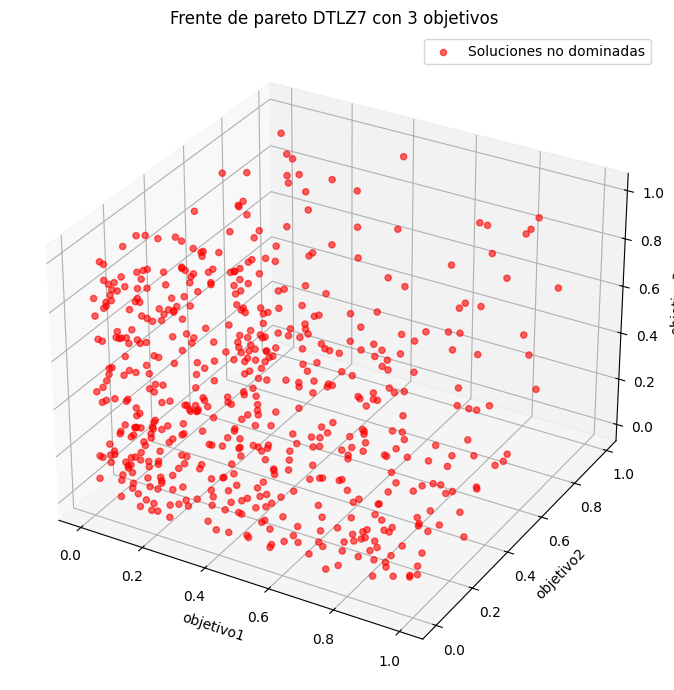

In [161]:
graficar_frente_pareto(F1_dtlz7, 3, 'DTLZ7')

## Hipervolumen

In [ ]:

F = np.array([
    [3, 5],
    [2, 6],
    [4, 2],
    [1, 8],
    [6, 1]
])

V_vectores, V_idxs = fast_non_dominated_sort_F1(F, 'minimize')
print(V_vectores)
print(V_idxs)

[array([3, 5]), array([2, 6]), array([4, 2]), array([1, 8]), array([6, 1])]
[0, 1, 2, 3, 4]


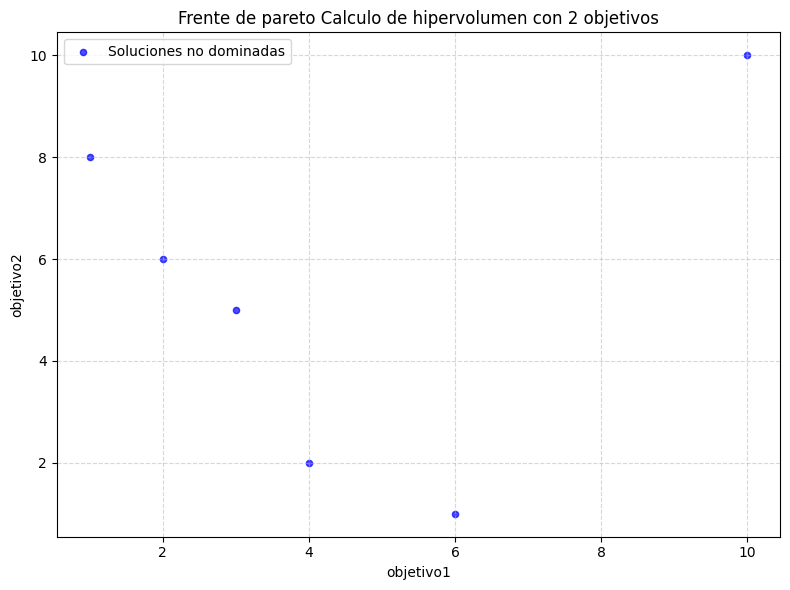

In [133]:
graficar_frente_pareto(V_vectores, 2, "Calculo de hipervolumen")

### Función para graficar los hipervolúmenes generados por el frente de pareto

In [ ]:
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def graficar_hipervolumen(pareto_front, reference_point, dimension):
    """
    Visualiza las contribuciones al hipervolumen de un frente de Pareto.

    Parámetros:
    - pareto_front (list o np.array): Lista de soluciones (listas o arrays de NumPy).
    - reference_point (list o np.array): El punto de referencia.
    - dimension (int): La dimensionalidad (2 o 3).
    """
    
    try:
        front_np = np.array(pareto_front)
        ref_point_np = np.array(reference_point)
        is_ref_point = np.all(front_np == ref_point_np, axis=1)
        front_cleaned = front_np[~is_ref_point]
        
        if len(front_cleaned) == 0:
            print("El frente de Pareto está vacío o solo contenía el punto de referencia.")
            return

    except Exception as e:
        print(f"Error procesando los datos de entrada: {e}")
        print("Asegúrate de que 'pareto_front' y 'reference_point' tengan la misma dimensión.")
        return

    colors = plt.cm.viridis(np.linspace(0, 1, len(front_cleaned)))
    
    if dimension == 2:
        fig, ax = plt.subplots(figsize=(10, 8))
        
        for i, p in enumerate(front_cleaned):
            
            width = ref_point_np[0] - p[0]
            height = ref_point_np[1] - p[1]
            
            if width > 0 and height > 0:
                rect = patches.Rectangle(
                    (p[0], p[1]),     # (x, y) de la esquina inferior izquierda
                    width,           # ancho
                    height,          # alto
                    color=colors[i],
                    alpha=0.3,       
                    edgecolor=colors[i],
                    linewidth=1.5
                )
                ax.add_patch(rect)
        
        ax.scatter(front_cleaned[:, 0], front_cleaned[:, 1], c='black', s=40, zorder=10, label='Frente (S)')
        ax.scatter(ref_point_np[0], ref_point_np[1], c='red', s=100, marker='X', zorder=10, label='Referencia (r)')
        
        ax.set_xlabel('Objetivo 1 (f1)')
        ax.set_ylabel('Objetivo 2 (f2)')
        ax.set_title(f'Gráfico del hipervolumen')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.6)

    elif dimension == 3:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        for i, p in enumerate(front_cleaned):
            r = ref_point_np
            
            if np.any(p >= r):
                print(f"Omitiendo punto {p} porque no es dominado por {r}")
                continue
            
            v = np.array([
                [p[0], p[1], p[2]], [r[0], p[1], p[2]], [r[0], r[1], p[2]], [p[0], r[1], p[2]],
                [p[0], p[1], r[2]], [r[0], p[1], r[2]], [r[0], r[1], r[2]], [p[0], r[1], r[2]]
            ])

            faces = [
                [v[0], v[1], v[2], v[3]], # Cara inferior
                [v[4], v[5], v[6], v[7]], # Cara superior
                [v[0], v[1], v[5], v[4]], # Cara lateral 1
                [v[1], v[2], v[6], v[5]], # Cara lateral 2
                [v[2], v[3], v[7], v[6]], # Cara lateral 3
                [v[3], v[0], v[4], v[7]]  # Cara lateral 4
            ]
            
            collection = Poly3DCollection(faces, facecolors=colors[i], 
                                          linewidths=0.5, edgecolors=colors[i], 
                                          alpha=0.15)
            ax.add_collection3d(collection)
        ax.scatter(front_cleaned[:, 0], front_cleaned[:, 1], front_cleaned[:, 2], 
                   c='black', s=40, zorder=10, label='Frente (S)')
        ax.scatter(ref_point_np[0], ref_point_np[1], ref_point_np[2], 
                   c='red', s=100, marker='X', zorder=10, label='Referencia (r)')
        
        ax.set_xlabel('Objetivo 1 (f1)')
        ax.set_ylabel('Objetivo 2 (f2)')
        ax.set_zlabel('Objetivo 3 (f3)')
        ax.set_title(f'Gráfico Hipervolumen')
        ax.legend()

    else:
        print(f"Error: La dimensión {dimension} no está soportada. Usa 2 o 3.")
        return
        
    plt.show()

C:\Users\DELL5400\AppData\Local\Temp\ipykernel_8888\1448710696.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle(


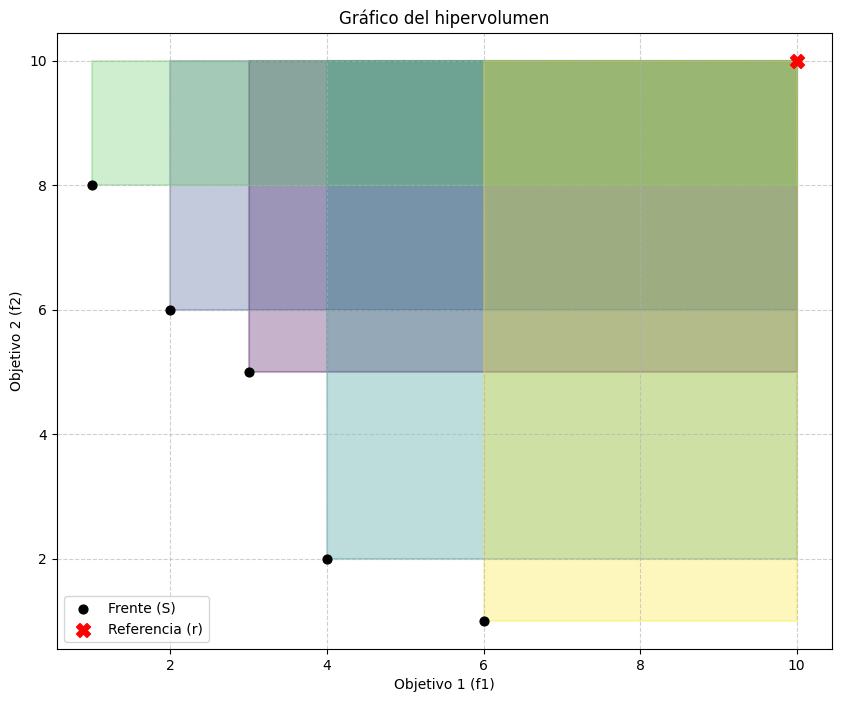

In [140]:
graficar_hipervolumen(V_vectores, np.array([10,10]), 2)

In [141]:
!pip install pymoo

Defaulting to user installation because normal site-packages is not writeable


### Calculo del hipervolumen con pymoo

In [142]:
import numpy as np
from pymoo.indicators.hv import Hypervolume

F = np.array([
    [3, 5],
    [2, 6],
    [4, 2],
    [1, 8],
    [6, 1]
])


ref_point = np.array([10.0, 10.0])

hyp = Hypervolume(ref_point=ref_point)

hv_value = hyp.do(F)

# --- 4. Mostrar Resultado ---
print(f"Puntos del Frente (F):\n{F}\n")
print(f"Punto de Referencia (r): {ref_point}\n")
print(f"Valor del Hipervolumen (HV): {hv_value}")

# Verificación del resultado manual
#assert hv_value == 63.0

Puntos del Frente (F):
[[3 5]
 [2 6]
 [4 2]
 [1 8]
 [6 1]]

Punto de Referencia (r): [10. 10.]

Valor del Hipervolumen (HV): 63.0


In [ ]:
from pymoo.problems import get_problem

# DTLZ1
# M: number of objectives, n_var: number of design variables
problem_dtlz1 = get_problem("dtlz1", n_var=7, n_obj=3)
# You can then use this problem object with pymoo's algorithms

# DTLZ2
problem_dtlz2 = get_problem("dtlz2", n_var=12, n_obj=3)
# You can then use this problem object with pymoo's algorithms

# DTLZ7
problem_dtlz7 = get_problem("dtlz7", n_var=22, n_obj=3)
# You can then use this problem object with pymoo's algorithms

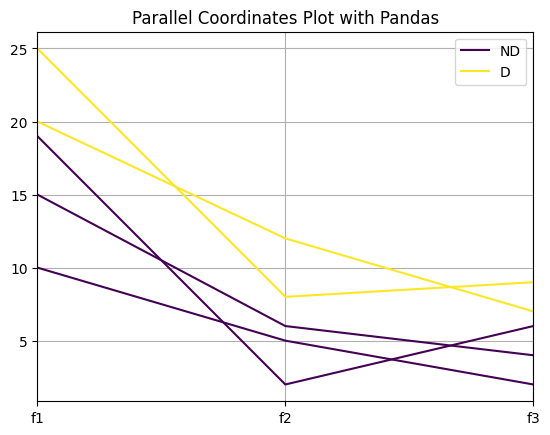

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'f1': [10, 20, 15, 25, 19],
        'f2': [5, 12, 6, 8, 2],
        'f3': [2, 7, 4, 9, 6],
        'category': ['ND', 'D', 'ND', 'D', 'ND']}
df = pd.DataFrame(data)

# Create the parallel coordinates plot
pd.plotting.parallel_coordinates(df, 'category', axvlines=False, colormap='viridis')
plt.title('Parallel Coordinates Plot with Pandas')
plt.show()

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def graficar_coordenadas_paralelas(solutions, categories=None, title="Gráfico de coordenadas paralelas"):
    """
    Grafica un conjunto de soluciones multiobjetivo usando coordenadas paralelas.
    
    Parámetros:
    ------------
    solutions : list or np.ndarray
        Lista de arrays (cada uno representa una solución con n objetivos).
    categories : list or None
        Lista opcional de etiquetas para cada solución (por ejemplo: ['ND', 'ND', 'D', ...]).
        Si no se proporciona, se usa una sola categoría ('All').
    title : str
        Título del gráfico.
    """

    # Convertir lista de arrays en un DataFrame
    df = pd.DataFrame(solutions, columns=[f'f{i+1}' for i in range(len(solutions[0]))])
    
    # Si no hay categorías, se asigna una sola
    if categories is None:
        df['category'] = 'All'
    else:
        df['category'] = categories
    
    # Crear gráfico de coordenadas paralelas
    plt.figure(figsize=(10, 6))
    pd.plotting.parallel_coordinates(df, 'category', colormap='viridis', linewidth=1.5, axvlines=False)
    
    plt.title(title)
    plt.xlabel('Funciones Objetivo')
    plt.ylabel('Valor')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


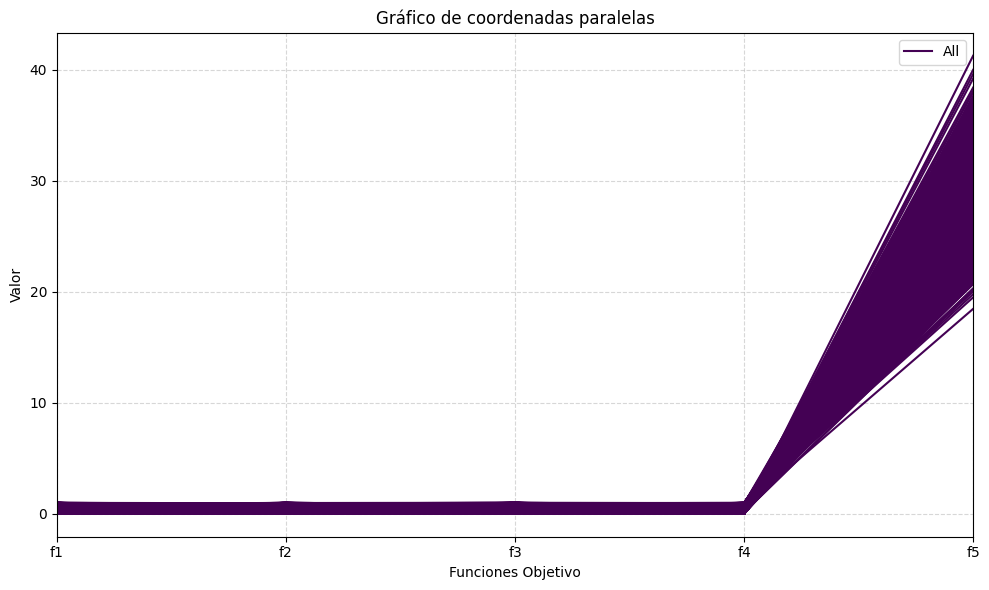

In [164]:
graficar_coordenadas_paralelas(frente_P_DTZ7)